In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
#from scipy import stats

cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
        'RAD','TAX','PTRATIO','B','LSTAT','MEDV']

data = pd.read_csv(r"C:\PythonScripts\course-files2\housing.data",
                    sep=' +', engine='python', header=None, 
                    names=cols)

data = data.loc[:,['LSTAT','MEDV']]
data

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [6]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
outlier_condition=((data<Q1-1.5*IQR) | (data>Q3+1.5*IQR))
data1=data[~outlier_condition.any(axis=1)]
data1

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


In [8]:
X=data1['LSTAT'].values.reshape(-1,1)
y=data1['MEDV'].values

In [10]:
scaler=StandardScaler()
scaler.fit(X)
X_std=scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

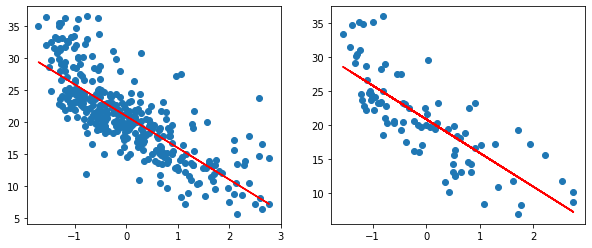

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(X_train, y_train)
ax[0].plot(X_train, y_pred_train, color='r')
ax[1].scatter(X_test, y_test)
ax[1].plot(X_test, y_pred_test, color='r')

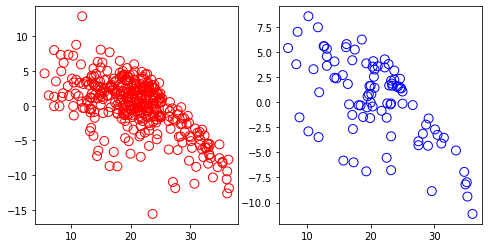

In [18]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(y_train, y_pred_train-y_train, edgecolors='r', facecolors='none', s=80)
ax[1].scatter(y_test, y_pred_test-y_test, edgecolors='b', facecolors='none', s=80)

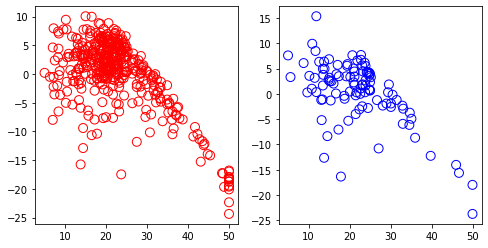

In [22]:
X=data['LSTAT'].values.reshape(-1,1)
y=data['MEDV'].values

scaler=StandardScaler()
scaler.fit(X)
X_std=scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)

lr=LinearRegression()
lr.fit(X_train, y_train)

y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(y_train, y_pred_train-y_train, edgecolors='r', facecolors='none', s=80)
ax[1].scatter(y_test, y_pred_test-y_test, edgecolors='b', facecolors='none', s=80)

bez usunięcia wartości odstających model jest gorszy, bo są większe różnice y i y_pred